In [ ]:
import numpy as np
import cv2
import time

def apply_mean_filter(image, kernel_size):
    filtered_image = cv2.blur(image, (kernel_size, kernel_size))
    return filtered_image

def apply_median_filter(image, kernel_size):
    filtered_image = cv2.medianBlur(image, kernel_size)
    return filtered_image

def apply_gaussian_filter(image, kernel_size, sigma):
    filtered_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)
    return filtered_image

def main():
    # Load the input image
    input_image = cv2.imread('test.jpg', 0)  # Load as grayscale image

    # Add Gaussian noise to the input image
    gaussian_noise = np.random.normal(0, 20, input_image.shape).astype(np.uint8)
    noisy_image = cv2.add(input_image, gaussian_noise)

    # Apply mean filter to remove Gaussian noise
    mean_filtered_image = apply_mean_filter(noisy_image, kernel_size=3)

    # Apply median filter to remove Gaussian noise
    median_filtered_image = apply_median_filter(noisy_image, kernel_size=3)

    # Apply Gaussian filter to remove Gaussian noise
    gaussian_filtered_image = apply_gaussian_filter(noisy_image, kernel_size=3, sigma=1.5)

    # Display the original image and the filtered images
    cv2.imshow('Input Image', input_image)
    cv2.imshow('Noisy Image', noisy_image)
    cv2.imshow('Mean Filtered Image', mean_filtered_image)
    cv2.imshow('Median Filtered Image', median_filtered_image)
    cv2.imshow('Gaussian Filtered Image', gaussian_filtered_image)

    # Wait until any key is pressed
    cv2.waitKey(0)

    # Close all windows
    cv2.destroyAllWindows()

if __name__ == '__main__':
    main()


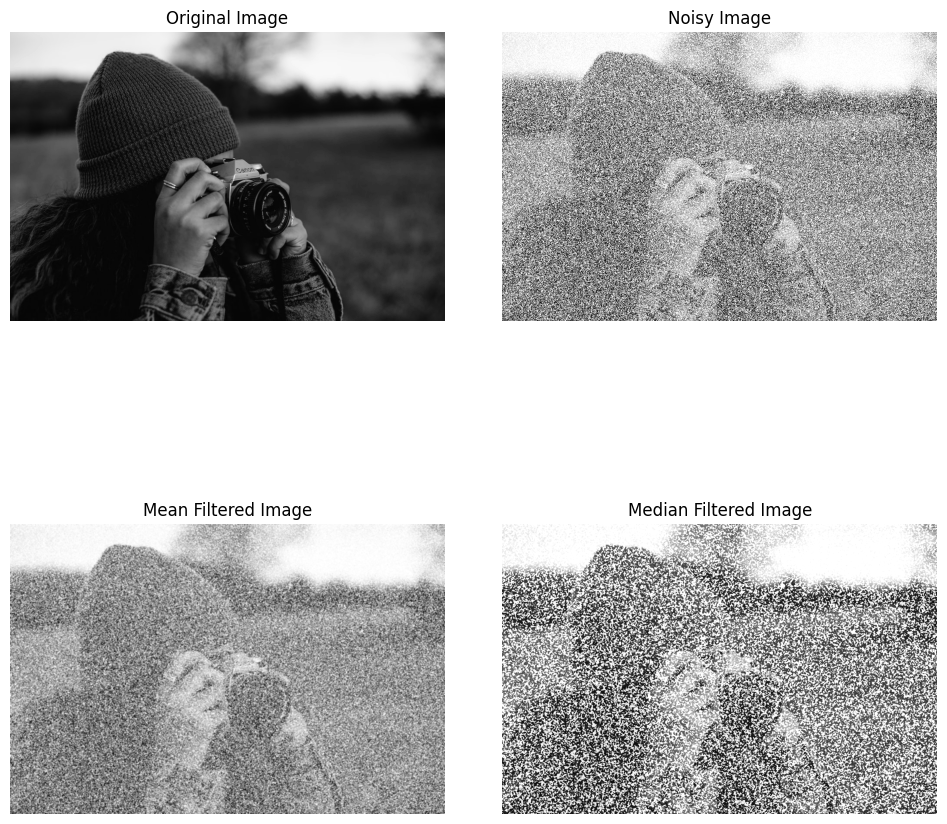

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def apply_mean_filter(image, kernel_size):
    filtered_image = cv2.blur(image, (kernel_size, kernel_size))
    return filtered_image

def apply_median_filter(image, kernel_size):
    filtered_image = cv2.medianBlur(image, kernel_size)
    return filtered_image

def apply_gaussian_filter(image, kernel_size, sigma):
    filtered_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)
    return filtered_image

def plot_images(original, noisy, filtered_mean, filtered_median, filtered_gaussian):
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    fig.tight_layout()

    axes[0, 0].imshow(original, cmap='gray')
    axes[0, 0].set_title('Original Image')

    axes[0, 1].imshow(noisy, cmap='gray')
    axes[0, 1].set_title('Noisy Image')

    axes[1, 0].imshow(filtered_mean, cmap='gray')
    axes[1, 0].set_title('Mean Filtered Image')

    axes[1, 1].imshow(filtered_median, cmap='gray')
    axes[1, 1].set_title('Median Filtered Image')

    for ax in axes.flat:
        ax.axis('off')

    plt.show()

def main():
    # Load the input image
    input_image = cv2.imread('test.jpg', 0)  # Load as grayscale image

    # Add Gaussian noise to the input image
    gaussian_noise = np.random.normal(0, 20, input_image.shape).astype(np.uint8)
    noisy_image = cv2.add(input_image, gaussian_noise)

    # Apply mean filter to remove Gaussian noise
    mean_filtered_image = apply_mean_filter(noisy_image, kernel_size=3)

    # Apply median filter to remove Gaussian noise
    median_filtered_image = apply_median_filter(noisy_image, kernel_size=3)

    # Apply Gaussian filter to remove Gaussian noise
    gaussian_filtered_image = apply_gaussian_filter(noisy_image, kernel_size=3, sigma=1.5)

    # Plot the images
    plot_images(input_image, noisy_image, mean_filtered_image, median_filtered_image, gaussian_filtered_image)

if __name__ == '__main__':
    main()


/var/folders/q8/dv8fwkl52qx_2yh5w017lk340000gn/T/ipykernel_16670/3687481213.py:55: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  noise_image[salt_coords] = 255
/var/folders/q8/dv8fwkl52qx_2yh5w017lk340000gn/T/ipykernel_16670/3687481213.py:57: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  noise_image[pepper_coords] = 0


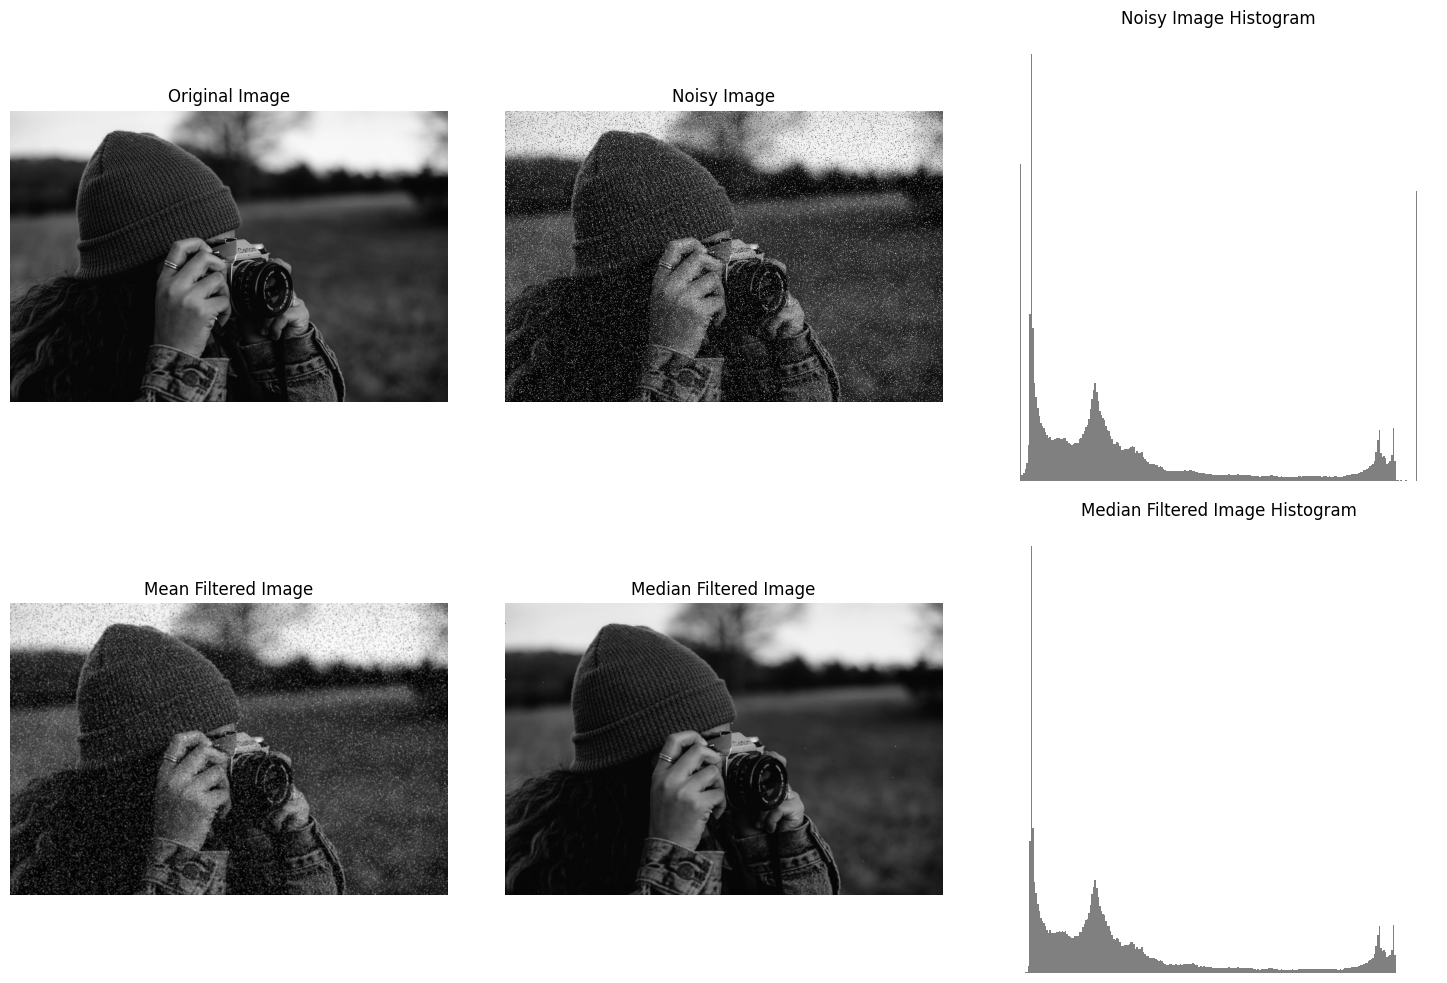

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def apply_mean_filter(image, kernel_size):
    filtered_image = cv2.blur(image, (kernel_size, kernel_size))
    return filtered_image

def apply_median_filter(image, kernel_size):
    filtered_image = cv2.medianBlur(image, kernel_size)
    return filtered_image

def plot_images_with_histograms(original, noisy, mean_filtered, median_filtered):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.tight_layout()

    axes[0, 0].imshow(original, cmap='gray')
    axes[0, 0].set_title('Original Image')

    axes[0, 1].imshow(noisy, cmap='gray')
    axes[0, 1].set_title('Noisy Image')

    axes[0, 2].hist(noisy.ravel(), bins=256, color='gray')
    axes[0, 2].set_title('Noisy Image Histogram')

    axes[1, 0].imshow(mean_filtered, cmap='gray')
    axes[1, 0].set_title('Mean Filtered Image')

    axes[1, 1].imshow(median_filtered, cmap='gray')
    axes[1, 1].set_title('Median Filtered Image')

    axes[1, 2].hist(median_filtered.ravel(), bins=256, color='gray')
    axes[1, 2].set_title('Median Filtered Image Histogram')

    for ax in axes.flat:
        ax.axis('off')

    plt.show()

def main():
    # Load the input image
    input_image = cv2.imread('test.jpg', 0)  # Load as grayscale image

    # Add salt and pepper noise to the input image
    noise_image = np.copy(input_image)
    noise_ratio = 0.05  # Adjust this value to control the noise density
    num_noise_pixels = int(noise_ratio * input_image.size)

    # Generate random coordinates for salt noise
    salt_coords = [np.random.randint(0, i - 1, num_noise_pixels) for i in input_image.shape]
    # Generate random coordinates for pepper noise
    pepper_coords = [np.random.randint(0, i - 1, num_noise_pixels) for i in input_image.shape]

    # Add salt noise
    noise_image[salt_coords] = 255
    # Add pepper noise
    noise_image[pepper_coords] = 0

    # Apply mean filter to remove salt and pepper noise
    mean_filtered_image = apply_mean_filter(noise_image, kernel_size=3)

    # Apply median filter to remove salt and pepper noise
    median_filtered_image = apply_median_filter(noise_image, kernel_size=3)

    # Plot the images with histograms
    plot_images_with_histograms(input_image, noise_image, mean_filtered_image, median_filtered_image)

if __name__ == '__main__':
    main()


/var/folders/q8/dv8fwkl52qx_2yh5w017lk340000gn/T/ipykernel_16670/3390732977.py:64: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  noise_image[salt_coords] = 255
/var/folders/q8/dv8fwkl52qx_2yh5w017lk340000gn/T/ipykernel_16670/3390732977.py:66: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  noise_image[pepper_coords] = 0


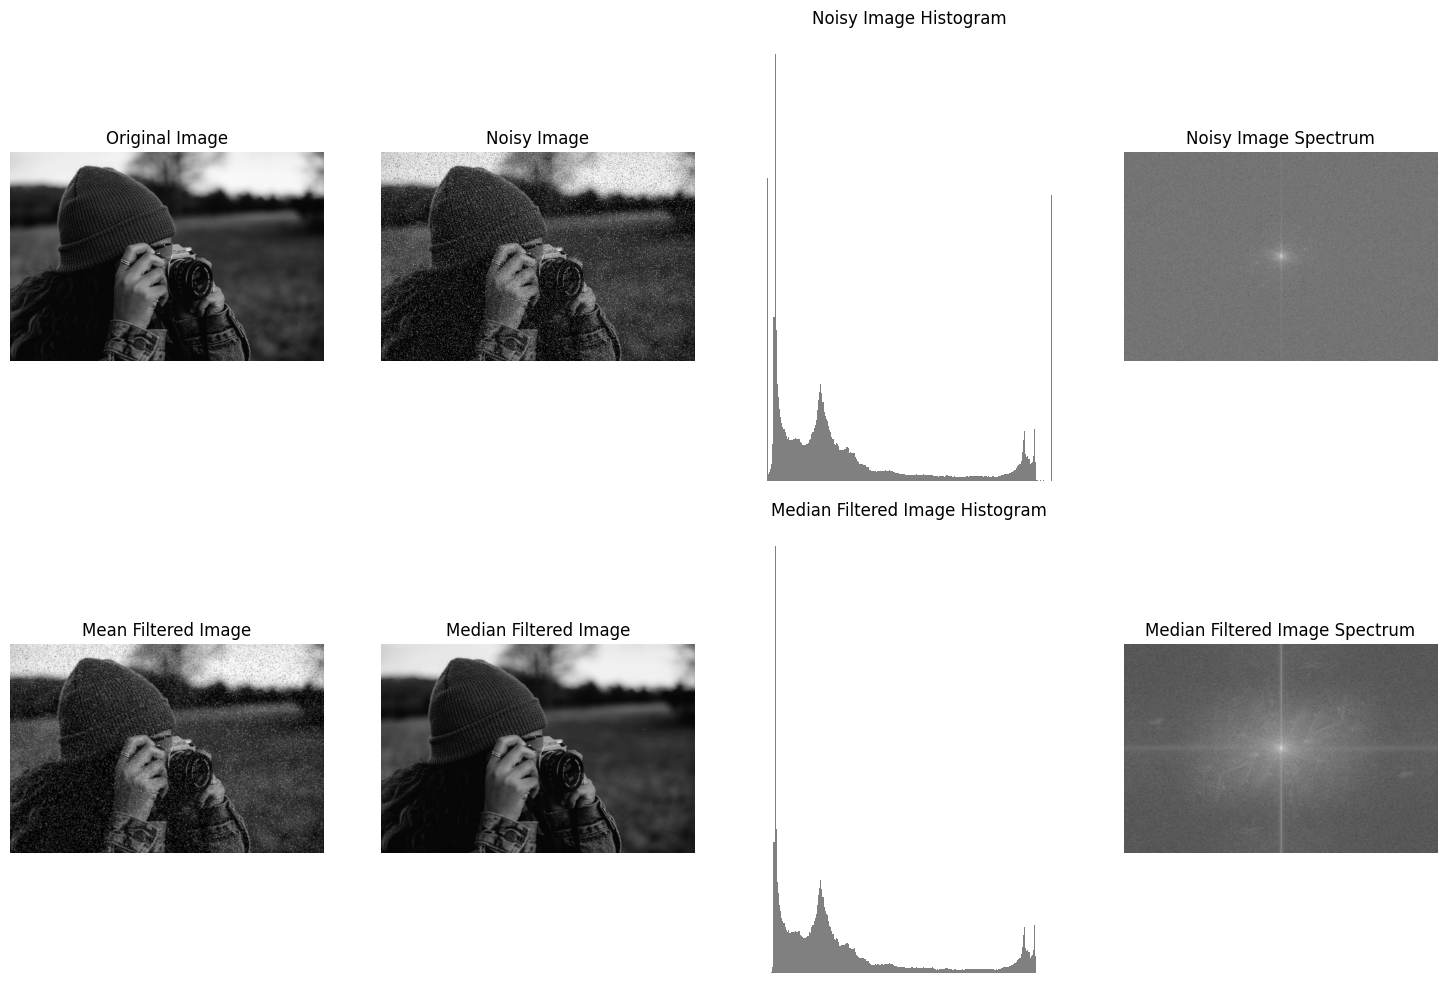

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def apply_mean_filter(image, kernel_size):
    filtered_image = cv2.blur(image, (kernel_size, kernel_size))
    return filtered_image

def apply_median_filter(image, kernel_size):
    filtered_image = cv2.medianBlur(image, kernel_size)
    return filtered_image

def plot_images_with_histograms_spectrum(original, noisy, mean_filtered, median_filtered):
    fig, axes = plt.subplots(2, 4, figsize=(15, 10))
    fig.tight_layout()

    axes[0, 0].imshow(original, cmap='gray')
    axes[0, 0].set_title('Original Image')

    axes[0, 1].imshow(noisy, cmap='gray')
    axes[0, 1].set_title('Noisy Image')

    axes[0, 2].hist(noisy.ravel(), bins=256, color='gray')
    axes[0, 2].set_title('Noisy Image Histogram')

    axes[0, 3].imshow(np.log1p(np.abs(np.fft.fftshift(np.fft.fft2(noisy)))), cmap='gray')
    axes[0, 3].set_title('Noisy Image Spectrum')

    axes[1, 0].imshow(mean_filtered, cmap='gray')
    axes[1, 0].set_title('Mean Filtered Image')

    axes[1, 1].imshow(median_filtered, cmap='gray')
    axes[1, 1].set_title('Median Filtered Image')

    axes[1, 2].hist(median_filtered.ravel(), bins=256, color='gray')
    axes[1, 2].set_title('Median Filtered Image Histogram')

    axes[1, 3].imshow(np.log1p(np.abs(np.fft.fftshift(np.fft.fft2(median_filtered)))), cmap='gray')
    axes[1, 3].set_title('Median Filtered Image Spectrum')

    for ax in axes.flat:
        ax.axis('off')

    plt.show()

def main():
    # Load the input image
    input_image = cv2.imread('test.jpg')

    # Convert the input image to grayscale
    grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

    # Add salt and pepper noise to the grayscale image
    noise_image = np.copy(grayscale_image)
    noise_ratio = 0.05  # Adjust this value to control the noise density
    num_noise_pixels = int(noise_ratio * grayscale_image.size)

    # Generate random coordinates for salt noise
    salt_coords = [np.random.randint(0, i - 1, num_noise_pixels) for i in grayscale_image.shape]
    # Generate random coordinates for pepper noise
    pepper_coords = [np.random.randint(0, i - 1, num_noise_pixels) for i in grayscale_image.shape]

    # Add salt noise
    noise_image[salt_coords] = 255
    # Add pepper noise
    noise_image[pepper_coords] = 0

    # Apply mean filter to remove salt and pepper noise
    mean_filtered_image = apply_mean_filter(noise_image, kernel_size=3)

    # Apply median filter to remove salt and pepper noise
    median_filtered_image = apply_median_filter(noise_image, kernel_size=3)

    # Plot the images with histograms and spectra
    plot_images_with_histograms_spectrum(grayscale_image, noise_image, mean_filtered_image, median_filtered_image)

if __name__ == '__main__':
    main()


/var/folders/q8/dv8fwkl52qx_2yh5w017lk340000gn/T/ipykernel_17016/3385514727.py:80: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  noise_image[salt_coords] = 255
/var/folders/q8/dv8fwkl52qx_2yh5w017lk340000gn/T/ipykernel_17016/3385514727.py:82: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  noise_image[pepper_coords] = 0


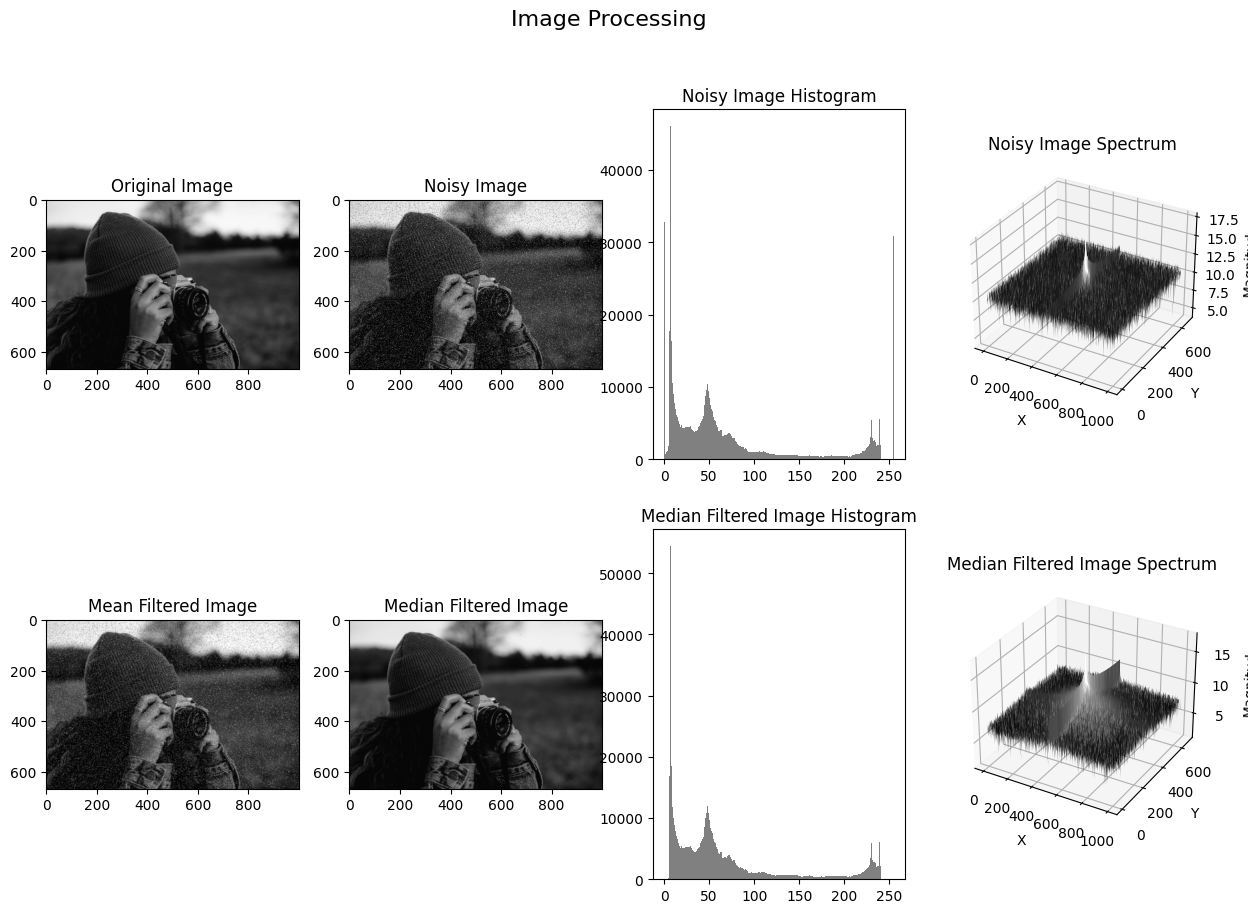

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def apply_mean_filter(image, kernel_size):
    filtered_image = cv2.blur(image, (kernel_size, kernel_size))
    return filtered_image

def apply_median_filter(image, kernel_size):
    filtered_image = cv2.medianBlur(image, kernel_size)
    return filtered_image

def plot_images_with_histograms_spectrum(original, noisy, mean_filtered, median_filtered):
    fig = plt.figure(figsize=(15, 10))
    fig.suptitle('Image Processing', fontsize=16)

    ax1 = fig.add_subplot(2, 4, 1)
    ax1.imshow(original, cmap='gray')
    ax1.set_title('Original Image')

    ax2 = fig.add_subplot(2, 4, 2)
    ax2.imshow(noisy, cmap='gray')
    ax2.set_title('Noisy Image')

    ax3 = fig.add_subplot(2, 4, 3)
    ax3.hist(noisy.ravel(), bins=256, color='gray')
    ax3.set_title('Noisy Image Histogram')

    ax4 = fig.add_subplot(2, 4, 4, projection='3d')
    spectrum_noisy = np.abs(np.fft.fftshift(np.fft.fftn(noisy)))
    ax4.set_title('Noisy Image Spectrum')
    x, y = np.meshgrid(range(spectrum_noisy.shape[1]), range(spectrum_noisy.shape[0]))
    ax4.plot_surface(x, y, np.log1p(spectrum_noisy), cmap='gray')
    ax4.set_xlabel('X')
    ax4.set_ylabel('Y')
    ax4.set_zlabel('Magnitude')

    ax5 = fig.add_subplot(2, 4, 5)
    ax5.imshow(mean_filtered, cmap='gray')
    ax5.set_title('Mean Filtered Image')

    ax6 = fig.add_subplot(2, 4, 6)
    ax6.imshow(median_filtered, cmap='gray')
    ax6.set_title('Median Filtered Image')

    ax7 = fig.add_subplot(2, 4, 7)
    ax7.hist(median_filtered.ravel(), bins=256, color='gray')
    ax7.set_title('Median Filtered Image Histogram')

    ax8 = fig.add_subplot(2, 4, 8, projection='3d')
spectrum_median_filtered = np.abs(np.fft.fftshift(np.fft.fftn(median_filtered)))
    ax8.set_title('Median Filtered Image Spectrum')
    x, y = np.meshgrid(range(spectrum_median_filtered.shape[1]), range(spectrum_median_filtered.shape[0]))
    ax8.plot_surface(x, y, np.log1p(spectrum_median_filtered), cmap='gray')
    ax8.set_xlabel('X')
    ax8.set_ylabel('Y')
    ax8.set_zlabel('Magnitude')

    plt.show()

def main():
    # Load the input image
    input_image = cv2.imread('test.jpg')

    # Convert the input image to grayscale
    grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

    # Add salt and pepper noise to the grayscale image
    noise_image = np.copy(grayscale_image)
    noise_ratio = 0.05  # Adjust this value to control the noise density
    num_noise_pixels = int(noise_ratio * grayscale_image.size)

    # Generate random coordinates for salt noise
    salt_coords = [np.random.randint(0, i - 1, num_noise_pixels) for i in grayscale_image.shape]
    # Generate random coordinates for pepper noise
    pepper_coords = [np.random.randint(0, i - 1, num_noise_pixels) for i in grayscale_image.shape]

    # Add salt noise
    noise_image[salt_coords] = 255
    # Add pepper noise
    noise_image[pepper_coords] = 0

    # Apply mean filter to remove salt and pepper noise
    mean_filtered_image = apply_mean_filter(noise_image, kernel_size=3)

    # Apply median filter to remove salt and pepper noise
    median_filtered_image = apply_median_filter(noise_image, kernel_size=3)

    # Plot the images with histograms and spectra
    plot_images_with_histograms_spectrum(grayscale_image, noise_image, mean_filtered_image, median_filtered_image)

if __name__ == '__main__':
    main()


/var/folders/q8/dv8fwkl52qx_2yh5w017lk340000gn/T/ipykernel_17016/1582900367.py:61: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  noise_image[salt_coords + [2]] = 255  # Add salt noise to the Blue channel
/var/folders/q8/dv8fwkl52qx_2yh5w017lk340000gn/T/ipykernel_17016/1582900367.py:63: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  noise_image[pepper_coords + [2]] = 0  # Add pepper noise to the Blue channel
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to t

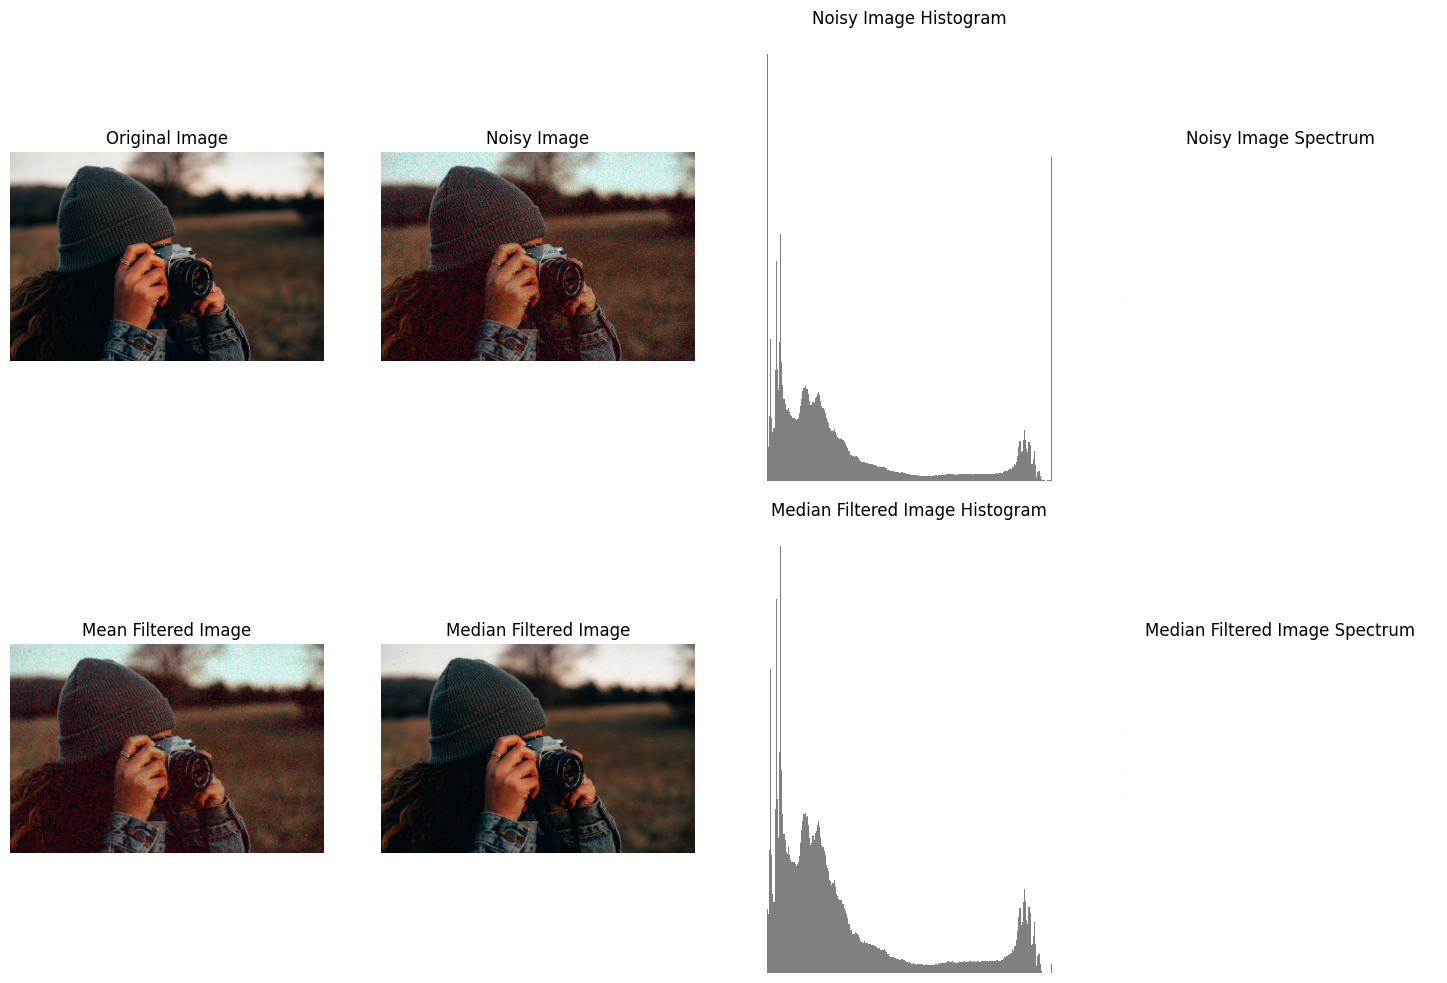

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def apply_mean_filter(image, kernel_size):
    filtered_image = cv2.blur(image, (kernel_size, kernel_size))
    return filtered_image

def apply_median_filter(image, kernel_size):
    filtered_image = cv2.medianBlur(image, kernel_size)
    return filtered_image

def plot_images_with_histograms_spectrum(original, noisy, mean_filtered, median_filtered):
    fig, axes = plt.subplots(2, 4, figsize=(15, 10))
    fig.tight_layout()

    axes[0, 0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    axes[0, 0].set_title('Original Image')

    axes[0, 1].imshow(cv2.cvtColor(noisy, cv2.COLOR_BGR2RGB))
    axes[0, 1].set_title('Noisy Image')

    axes[0, 2].hist(noisy.ravel(), bins=256, color='gray')
    axes[0, 2].set_title('Noisy Image Histogram')

    axes[0, 3].imshow(np.log1p(np.abs(np.fft.fftshift(np.fft.fft2(noisy)))), cmap='gray')
    axes[0, 3].set_title('Noisy Image Spectrum')

    axes[1, 0].imshow(cv2.cvtColor(mean_filtered, cv2.COLOR_BGR2RGB))
    axes[1, 0].set_title('Mean Filtered Image')

    axes[1, 1].imshow(cv2.cvtColor(median_filtered, cv2.COLOR_BGR2RGB))
    axes[1, 1].set_title('Median Filtered Image')

    axes[1, 2].hist(median_filtered.ravel(), bins=256, color='gray')
    axes[1, 2].set_title('Median Filtered Image Histogram')

    axes[1, 3].imshow(np.log1p(np.abs(np.fft.fftshift(np.fft.fft2(median_filtered)))), cmap='gray')
    axes[1, 3].set_title('Median Filtered Image Spectrum')

    for ax in axes.flat:
        ax.axis('off')

    plt.show()

def main():
    # Load the input image
    input_image = cv2.imread('test.jpg')

    # Add salt and pepper noise to the input image
    noise_image = np.copy(input_image)
    noise_ratio = 0.05  # Adjust this value to control the noise density
    num_noise_pixels = int(noise_ratio * input_image.size)

    # Generate random coordinates for salt noise
    salt_coords = [np.random.randint(0, i - 1, num_noise_pixels) for i in input_image.shape[:-1]]
    # Generate random coordinates for pepper noise
    pepper_coords = [np.random.randint(0, i - 1, num_noise_pixels) for i in input_image.shape[:-1]]

    # Add salt noise
    noise_image[salt_coords + [2]] = 255  # Add salt noise to the Blue channel
    # Add pepper noise
    noise_image[pepper_coords + [2]] = 0  # Add pepper noise to the Blue channel

    # Apply mean filter to remove salt and pepper noise
    mean_filtered_image = apply_mean_filter(noise_image, kernel_size=3)

    # Apply median filter to remove salt and pepper noise
    median_filtered_image = apply_median_filter(noise_image, kernel_size=3)

    # Plot the images with histograms and spectra
    plot_images_with_histograms_spectrum(input_image, noise_image, mean_filtered_image, median_filtered_image)

if __name__ == '__main__':
    main()


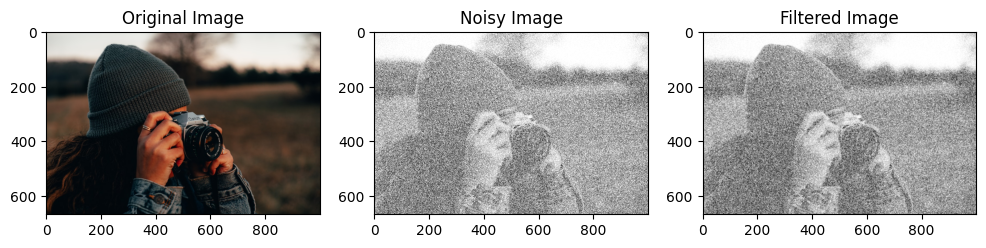

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_gaussian_filter(image, kernel_size, sigma):
    filtered_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)
    return filtered_image

def main():
    # Load the input image
    input_image = cv2.imread('test.jpg')

    # Convert the input image to grayscale
    grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

    # Generate Gaussian noise and add it to the grayscale image
    noise_image = np.copy(grayscale_image)
    mean = 0
    std_dev = 50  # Adjust this value to control the noise intensity
    noise = np.random.normal(mean, std_dev, grayscale_image.shape).astype(np.uint8)
    noise_image = cv2.add(grayscale_image, noise)

    # Apply Gaussian filter to remove Gaussian noise
    kernel_size = 3  # Adjust this value to control the blurring effect
    sigma = 1  # Adjust this value to control the standard deviation of the Gaussian distribution
    filtered_image = apply_gaussian_filter(noise_image, kernel_size, sigma)

    # Plot the original image, noisy image, and filtered image
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    axes[0].imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[1].imshow(noise_image, cmap='gray')
    axes[1].set_title('Noisy Image')
    axes[2].imshow(filtered_image, cmap='gray')
    axes[2].set_title('Filtered Image')
    plt.show()

if __name__ == '__main__':
    main()


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_wiener_filter(image, kernel, snr):
    # Estimate the power spectrum of the original image
    power_spectrum = np.abs(np.fft.fftshift(np.fft.fft2(image))) ** 2

    # Estimate the power spectrum of the noise
    noise_image = cv2.filter2D(image, -1, kernel)
    noise_power_spectrum = np.abs(np.fft.fftshift(np.fft.fft2(noise_image))) ** 2

    # Estimate the inverse power spectrum of the Wiener filter
    inverse_filter = np.conj(kernel) / (np.abs(kernel) ** 2 + snr * noise_power_spectrum / power_spectrum)

    # Apply the Wiener filter in the frequency domain
    filtered_spectrum = np.fft.ifft2(np.fft.ifftshift(inverse_filter * np.fft.fftshift(np.fft.fft2(image))))

    # Get the real part of the filtered image
    filtered_image = np.real(filtered_spectrum)

    # Normalize the filtered image to [0, 255]
    filtered_image = (filtered_image - np.min(filtered_image)) * 255 / (
                np.max(filtered_image) - np.min(filtered_image))
    filtered_image = filtered_image.astype(np.uint8)

    return filtered_image

def main():
    # Load the input image
    input_image = cv2.imread('test.jpg')

    # Convert the input image to grayscale
    grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

    # Generate Gaussian noise and add it to the grayscale image
    noise_image = np.copy(grayscale_image)
    mean = 0
    std_dev = 50  # Adjust this value to control the noise intensity
    noise = np.random.normal(mean, std_dev, grayscale_image.shape).astype(np.uint8)
    noise_image = cv2.add(grayscale_image, noise)

    # Generate the Wiener filter kernel
    kernel_size = 3  # Adjust this value to control the kernel size
    kernel = np.ones((kernel_size, kernel_size)) / kernel_size ** 2

    # Adjust the signal-to-noise ratio (SNR) to control the filtering strength
    snr = 0.1  # Adjust this value to control the SNR

    # Apply the Wiener filter to remove Gaussian noise
    filtered_image = apply_wiener_filter(noise_image, kernel, snr)

    # Plot the original image, noisy image, and filtered image
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    axes[0].imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[1].imshow(noise_image, cmap='gray')
    axes[1].set_title('Noisy Image')
    axes[2].imshow(filtered_image, cmap='gray')
    axes[2].set_title('Filtered Image')
    plt.show()

if __name__ == '__main__':
    main()


ValueError: operands could not be broadcast together with shapes (3,3) (667,1000) 

/var/folders/q8/dv8fwkl52qx_2yh5w017lk340000gn/T/ipykernel_17016/3385514727.py:80: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  noise_image[salt_coords] = 255
/var/folders/q8/dv8fwkl52qx_2yh5w017lk340000gn/T/ipykernel_17016/3385514727.py:82: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  noise_image[pepper_coords] = 0


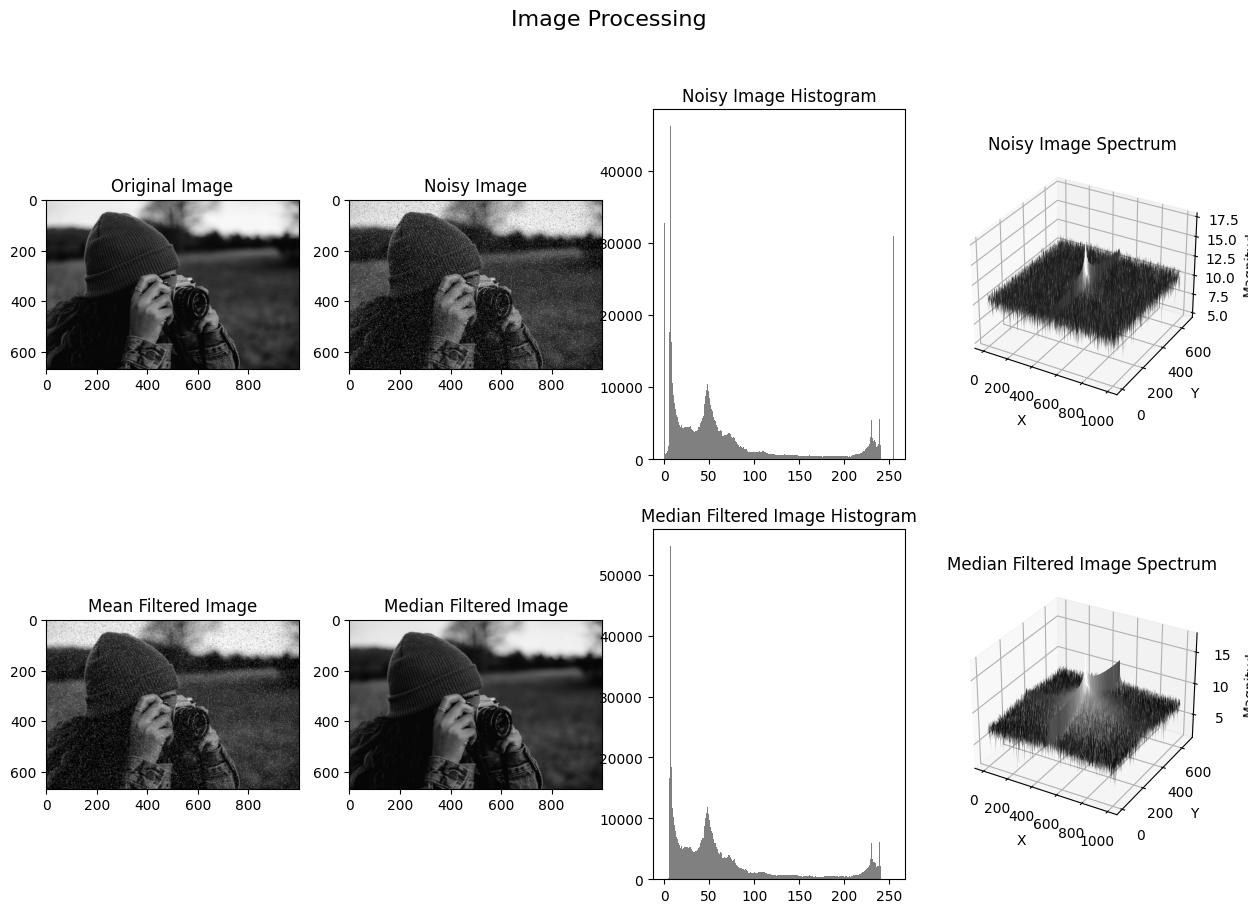

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def apply_mean_filter(image, kernel_size):
    filtered_image = cv2.blur(image, (kernel_size, kernel_size))
    return filtered_image

def apply_median_filter(image, kernel_size):
    filtered_image = cv2.medianBlur(image, kernel_size)
    return filtered_image

def plot_images_with_histograms_spectrum(original, noisy, mean_filtered, median_filtered):
    fig = plt.figure(figsize=(15, 10))
    fig.suptitle('Image Processing', fontsize=16)

    ax1 = fig.add_subplot(2, 4, 1)
    ax1.imshow(original, cmap='gray')
    ax1.set_title('Original Image')

    ax2 = fig.add_subplot(2, 4, 2)
    ax2.imshow(noisy, cmap='gray')
    ax2.set_title('Noisy Image')

    ax3 = fig.add_subplot(2, 4, 3)
    ax3.hist(noisy.ravel(), bins=256, color='gray')
    ax3.set_title('Noisy Image Histogram')

    ax4 = fig.add_subplot(2, 4, 4, projection='3d')
    spectrum_noisy = np.abs(np.fft.fftshift(np.fft.fftn(noisy)))
    ax4.set_title('Noisy Image Spectrum')
    x, y = np.meshgrid(range(spectrum_noisy.shape[1]), range(spectrum_noisy.shape[0]))
    ax4.plot_surface(x, y, np.log1p(spectrum_noisy), cmap='gray')
    ax4.set_xlabel('X')
    ax4.set_ylabel('Y')
    ax4.set_zlabel('Magnitude')

    ax5 = fig.add_subplot(2, 4, 5)
    ax5.imshow(mean_filtered, cmap='gray')
    ax5.set_title('Mean Filtered Image')

    ax6 = fig.add_subplot(2, 4, 6)
    ax6.imshow(median_filtered, cmap='gray')
    ax6.set_title('Median Filtered Image')

    ax7 = fig.add_subplot(2, 4, 7)
    ax7.hist(median_filtered.ravel(), bins=256, color='gray')
    ax7.set_title('Median Filtered Image Histogram')

    ax8 = fig.add_subplot(2, 4, 8, projection='3d')
    spectrum_median_filtered = np.abs(np.fft.fftshift(np.fft.fftn(median_filtered)))
    ax8.set_title('Median Filtered Image Spectrum')
    x, y = np.meshgrid(range(spectrum_median_filtered.shape[1]), range(spectrum_median_filtered.shape[0]))
    ax8.plot_surface(x, y, np.log1p(spectrum_median_filtered), cmap='gray')
    ax8.set_xlabel('X')
    ax8.set_ylabel('Y')
    ax8.set_zlabel('Magnitude')

    plt.show()

def main():
    # Load the input image
    input_image = cv2.imread('test.jpg')

    # Convert the input image to grayscale
    grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

    # Add salt and pepper noise to the grayscale image
    noise_image = np.copy(grayscale_image)
    noise_ratio = 0.05  # Adjust this value to control the noise density
    num_noise_pixels = int(noise_ratio * grayscale_image.size)

    # Generate random coordinates for salt noise
    salt_coords = [np.random.randint(0, i - 1, num_noise_pixels) for i in grayscale_image.shape]
    # Generate random coordinates for pepper noise
    pepper_coords = [np.random.randint(0, i - 1, num_noise_pixels) for i in grayscale_image.shape]

    # Add salt noise
    noise_image[salt_coords] = 255
    # Add pepper noise
    noise_image[pepper_coords] = 0

    # Apply mean filter to remove salt and pepper noise
    mean_filtered_image = apply_mean_filter(noise_image, kernel_size=3)

    # Apply median filter to remove salt and pepper noise
    median_filtered_image = apply_median_filter(noise_image, kernel_size=3)

    # Plot the images with histograms and spectra
    plot_images_with_histograms_spectrum(grayscale_image, noise_image, mean_filtered_image, median_filtered_image)

if __name__ == '__main__':
    main()


/var/folders/q8/dv8fwkl52qx_2yh5w017lk340000gn/T/ipykernel_17016/3915669069.py:81: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  noise_image[salt_coords] = 255
/var/folders/q8/dv8fwkl52qx_2yh5w017lk340000gn/T/ipykernel_17016/3915669069.py:83: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  noise_image[pepper_coords] = 0


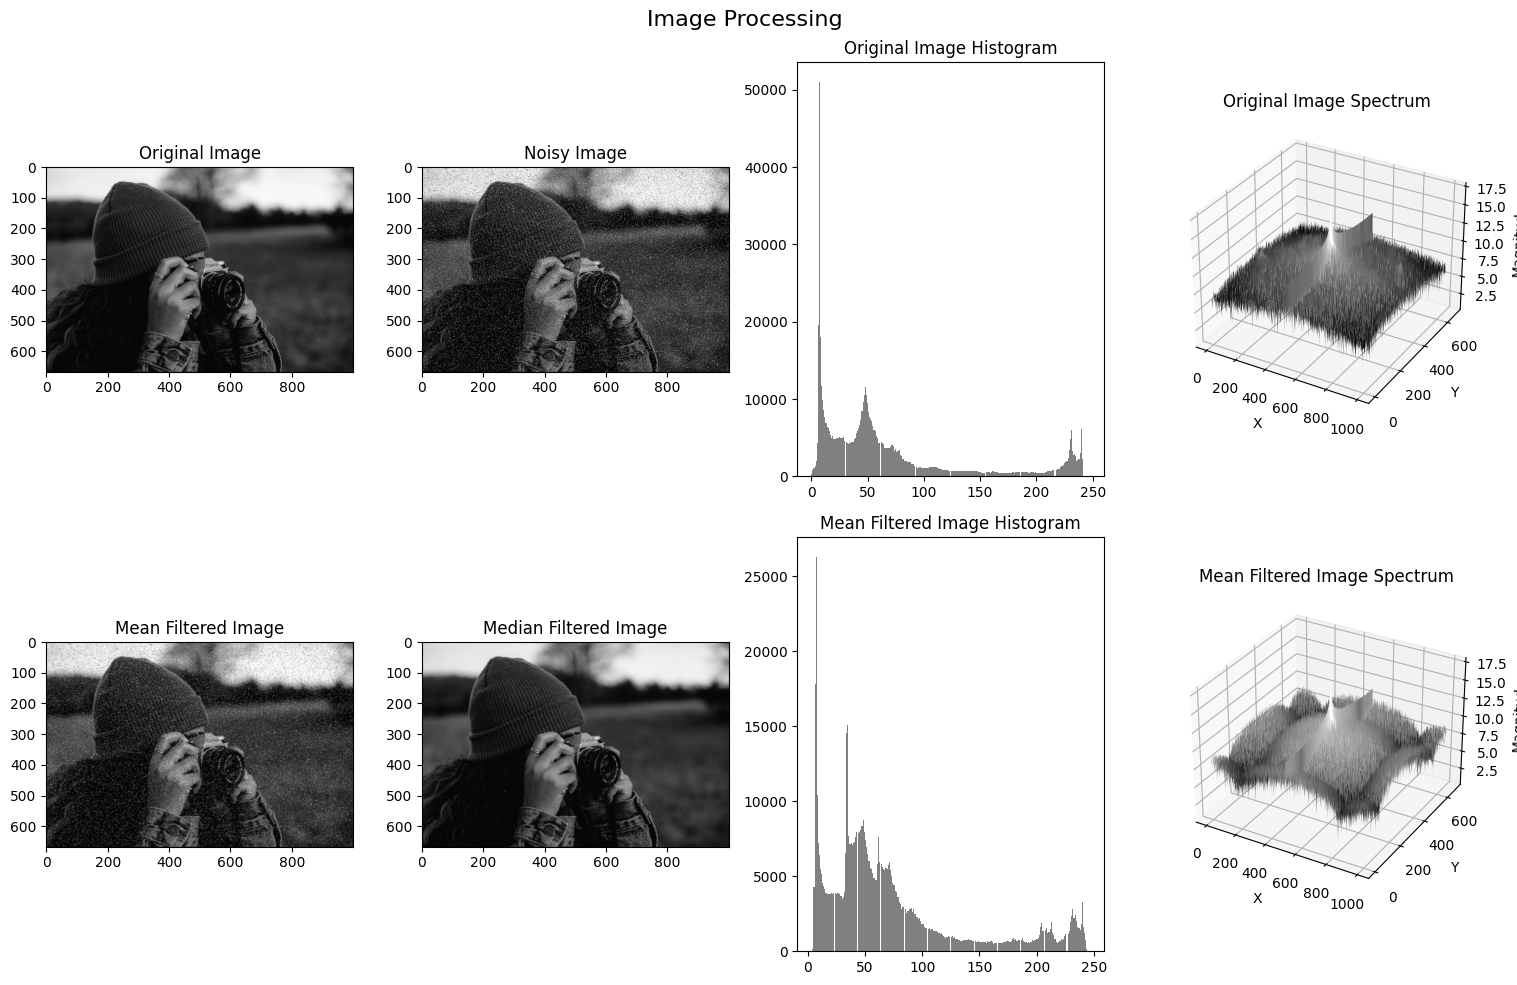

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def apply_mean_filter(image, kernel_size):
    filtered_image = cv2.blur(image, (kernel_size, kernel_size))
    return filtered_image

def apply_median_filter(image, kernel_size):
    filtered_image = cv2.medianBlur(image, kernel_size)
    return filtered_image

def plot_images_with_histograms_spectra(original, noisy, mean_filtered, median_filtered):
    fig = plt.figure(figsize=(15, 10))
    fig.suptitle('Image Processing', fontsize=16)

    ax1 = fig.add_subplot(2, 4, 1)
    ax1.imshow(original, cmap='gray')
    ax1.set_title('Original Image')

    ax2 = fig.add_subplot(2, 4, 2)
    ax2.imshow(noisy, cmap='gray')
    ax2.set_title('Noisy Image')

    ax3 = fig.add_subplot(2, 4, 3)
    ax3.hist(original.ravel(), bins=256, color='gray')
    ax3.set_title('Original Image Histogram')

    ax4 = fig.add_subplot(2, 4, 4, projection='3d')
    spectrum_original = np.abs(np.fft.fftshift(np.fft.fftn(original)))
    ax4.set_title('Original Image Spectrum')
    x, y = np.meshgrid(range(spectrum_original.shape[1]), range(spectrum_original.shape[0]))
    ax4.plot_surface(x, y, np.log1p(spectrum_original), cmap='gray')
    ax4.set_xlabel('X')
    ax4.set_ylabel('Y')
    ax4.set_zlabel('Magnitude')

    ax5 = fig.add_subplot(2, 4, 5)
    ax5.imshow(mean_filtered, cmap='gray')
    ax5.set_title('Mean Filtered Image')

    ax6 = fig.add_subplot(2, 4, 6)
    ax6.imshow(median_filtered, cmap='gray')
    ax6.set_title('Median Filtered Image')

    ax7 = fig.add_subplot(2, 4, 7)
    ax7.hist(mean_filtered.ravel(), bins=256, color='gray')
    ax7.set_title('Mean Filtered Image Histogram')

    ax8 = fig.add_subplot(2, 4, 8, projection='3d')
    spectrum_mean_filtered = np.abs(np.fft.fftshift(np.fft.fftn(mean_filtered)))
    ax8.set_title('Mean Filtered Image Spectrum')
    x, y = np.meshgrid(range(spectrum_mean_filtered.shape[1]), range(spectrum_mean_filtered.shape[0]))
    ax8.plot_surface(x, y, np.log1p(spectrum_mean_filtered), cmap='gray')
    ax8.set_xlabel('X')
    ax8.set_ylabel('Y')
    ax8.set_zlabel('Magnitude')

    fig.tight_layout()
    plt.show()

def main():
    # Load the input image
    input_image = cv2.imread('test.jpg')

    # Convert the input image to grayscale
    grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

    # Add salt and pepper noise to the grayscale image
    noise_image = np.copy(grayscale_image)
    noise_ratio = 0.05  # Adjust this value to control the noise density
    num_noise_pixels = int(noise_ratio * grayscale_image.size)

    # Generate random coordinates for salt noise
    salt_coords = [np.random.randint(0, i - 1, num_noise_pixels) for i in grayscale_image.shape]
    # Generate random coordinates for pepper noise
    pepper_coords = [np.random.randint(0, i - 1, num_noise_pixels) for i in grayscale_image.shape]

    # Add salt noise
    noise_image[salt_coords] = 255
    # Add pepper noise
    noise_image[pepper_coords] = 0

    # Apply mean filter to remove salt and pepper noise
    mean_filtered_image = apply_mean_filter(noise_image, kernel_size=3)

    # Apply median filter to remove salt and pepper noise
    median_filtered_image = apply_median_filter(noise_image, kernel_size=3)

    # Plot the images with histograms and spectra
    plot_images_with_histograms_spectra(grayscale_image, noise_image, mean_filtered_image, median_filtered_image)

if __name__ == '__main__':
    main()


In [1]:
pwd

'/Users/nanda/Documents/mini_project'